In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import PIL
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

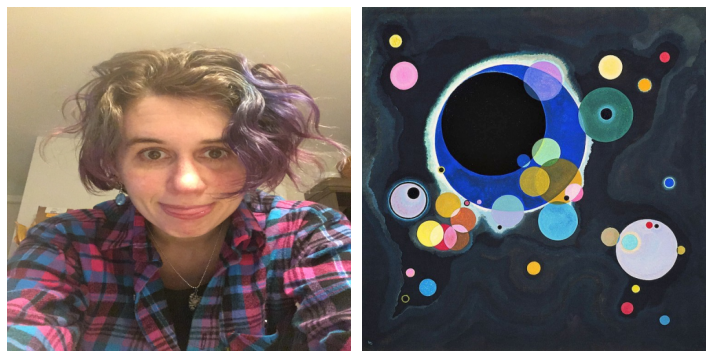

In [4]:
img = cv.imread("jess.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_2 = cv.imread("wassily-kandinsky-4.jpg")
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

dim = (500, 500)
# resize image
img = cv.resize(img, dim, interpolation = cv.INTER_AREA)
img_2 = cv.resize(img_2, dim, interpolation = cv.INTER_AREA)

show_img_compar(img, img_2)

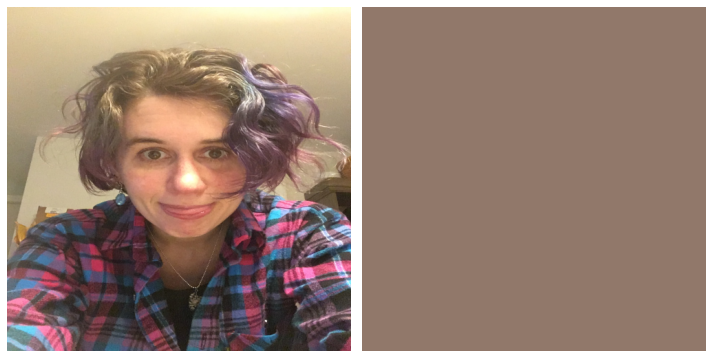

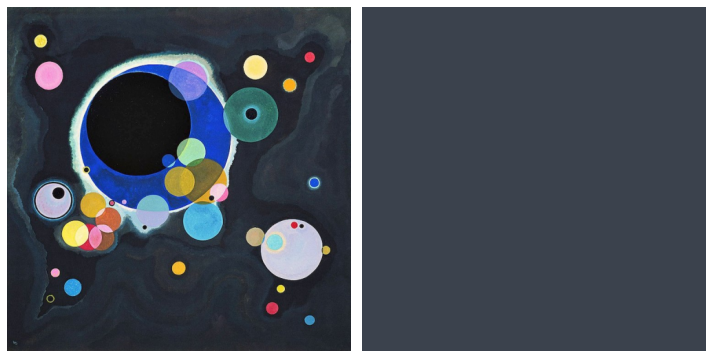

In [5]:
img_temp = img.copy()
img_temp[:,:,0], img_temp[:,:,1], img_temp[:,:,2] = np.average(img, axis=(0,1))

img_temp_2 = img_2.copy()
img_temp_2[:,:,0], img_temp_2[:,:,1], img_temp_2[:,:,2] = np.average(img_2, axis=(0,1))

show_img_compar(img, img_temp)
show_img_compar(img_2, img_temp_2)

In [6]:
#This makes it a list of all 250,000 pixels
# Explanation of reshaping with a -1 : https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
print(img.shape)
print(img.reshape(-1,3).shape)
img.reshape(-1,3)

(500, 500, 3)
(250000, 3)


array([[231, 204, 161],
       [229, 204, 160],
       [233, 210, 166],
       ...,
       [149,  55,  79],
       [160,  68,  91],
       [158,  66,  91]], dtype=uint8)

In [7]:
unique, counts = np.unique(img.reshape(-1,3), axis = 0, return_counts = True)
print(unique)
print(unique.shape)
print(counts)
print(len(counts))

[[ 16  18  15]
 [ 16  22  24]
 [ 17  22  19]
 ...
 [255 255 251]
 [255 255 252]
 [255 255 253]]
(131510, 3)
[1 1 1 ... 6 2 2]
131510


In [8]:
img.reshape(-1,3)[np.argmax(counts)]

array([233, 162, 135], dtype=uint8)

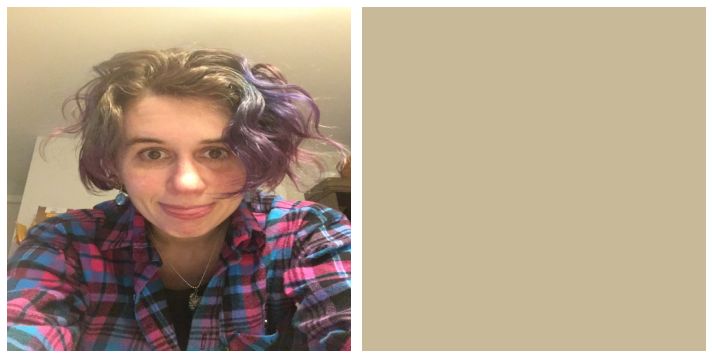

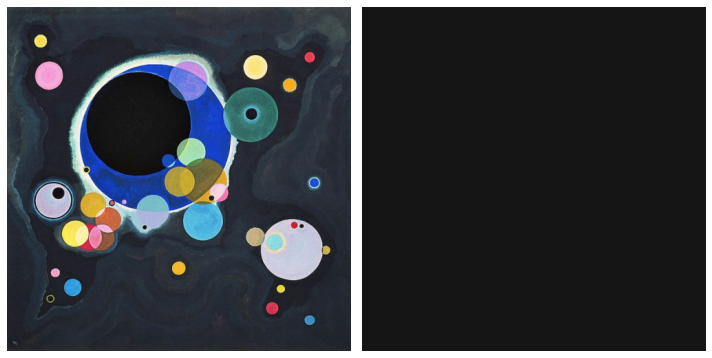

In [9]:
img_temp = img.copy()
unique, counts = np.unique(img_temp.reshape(-1, 3), axis=0, return_counts=True)
#this replaces the red band with the value of red that occurs most commonly in the most occuring color
img_temp[:,:,0], img_temp[:,:,1], img_temp[:,:,2] = unique[np.argmax(counts)]

img_temp_2 = img_2.copy()
unique, counts = np.unique(img_temp_2.reshape(-1, 3), axis=0, return_counts=True)
img_temp_2[:,:,0], img_temp_2[:,:,1], img_temp_2[:,:,2] = unique[np.argmax(counts)]

show_img_compar(img, img_temp)
show_img_compar(img_2, img_temp_2)

In [10]:
clt = KMeans(n_clusters = 20)
clt.fit(img.reshape(-1,3))

KMeans(n_clusters=20)

In [11]:
clt.labels_

array([ 7,  7,  7, ..., 17, 19, 19])

In [12]:
clt.cluster_centers_

array([[200.01871961, 180.65555105, 148.34307131],
       [106.21137402,  75.12229109,  71.32837171],
       [ 87.06781718,  57.58264725,  57.18165506],
       [152.16935062, 124.28142184,  98.62097408],
       [252.82083589, 245.2357099 , 208.41902274],
       [ 59.23456364,  46.11984428,  47.72956192],
       [105.77441268, 137.7478064 , 162.85989244],
       [222.72044886, 201.31182045, 162.49805221],
       [174.72131234, 152.38244928, 129.73272401],
       [137.07416093, 108.10156823, 123.72475451],
       [238.00880488, 170.39962432, 133.8032402 ],
       [ 40.01097328,  33.62418212,  31.74543348],
       [235.82717557, 123.48      , 164.57435115],
       [ 83.70939623,  92.90629406, 112.66055634],
       [ 66.91692745,  67.35040303,  78.40502608],
       [198.134384  , 133.5029656 , 106.38171496],
       [153.23183926, 195.19989696, 228.59556929],
       [128.43440952,  93.91756945,  80.30591011],
       [241.2293236 , 220.84219927, 179.21720898],
       [179.75834517,  85.97088

In [13]:
clt.cluster_centers_[1]

array([106.21137402,  75.12229109,  71.32837171])

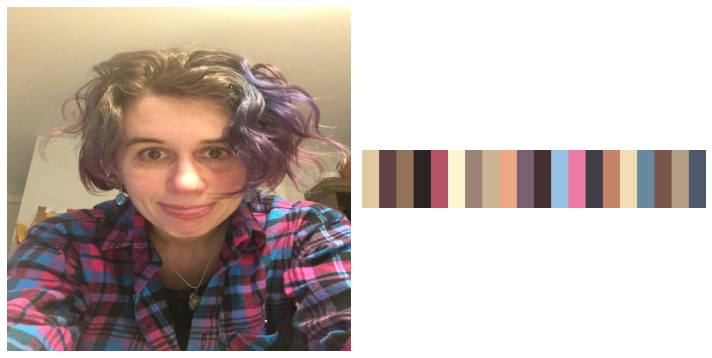

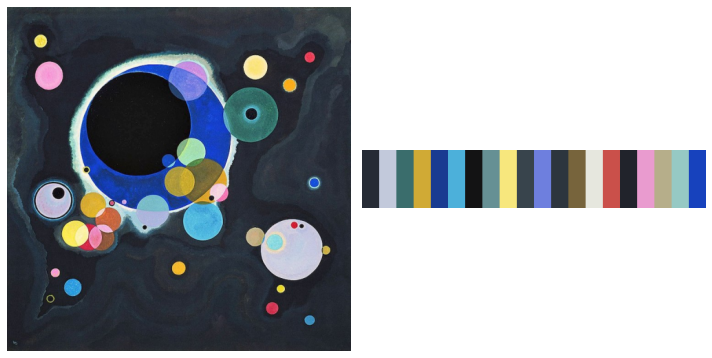

In [14]:
def palette(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

  
clt_1 = clt.fit(img.reshape(-1, 3))
show_img_compar(img, palette(clt_1))

clt_2 = clt.fit(img_2.reshape(-1, 3))
show_img_compar(img_2, palette(clt_2))